In [1]:
import pandas as pd
import numpy as np
from bayes_opt import BayesianOptimization 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn import svm
import os
from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Convolution2D
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import pickle

ModuleNotFoundError: No module named 'bayes_opt'

In [21]:
#loading and displaying BOTNET 2018 dataset
dataset = pd.read_csv("Dataset/UNSW_2018_IoT_Botnet_Full5pc_4.csv", low_memory=False)
dataset

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,3000001,1.528099e+09,e,1,udp,3,192.168.100.147,6226,192.168.100.3,80,...,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
1,3000002,1.528099e+09,e,1,udp,3,192.168.100.147,6227,192.168.100.3,80,...,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
2,3000003,1.528099e+09,e,1,udp,3,192.168.100.147,6228,192.168.100.3,80,...,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
3,3000004,1.528099e+09,e,1,udp,3,192.168.100.147,6229,192.168.100.3,80,...,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
4,3000005,1.528099e+09,e,1,udp,3,192.168.100.147,6230,192.168.100.3,80,...,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668517,3668518,1.529381e+09,e,1,tcp,1,192.168.100.150,35064,192.168.100.3,22,...,9.889330,19,19,455.754000,9.889330,30,30,1,Theft,Keylogging
668518,3668519,1.529381e+09,e,1,tcp,1,192.168.100.150,35066,192.168.100.3,22,...,9.889330,19,19,10453.000000,9.889330,30,30,1,Theft,Keylogging
668519,3668520,1.529381e+09,e,1,tcp,1,192.168.100.150,35070,192.168.100.3,22,...,9.889330,19,19,10.785200,9.889330,441,441,1,Theft,Keylogging
668520,3668521,1.529381e+09,e,1,tcp,1,192.168.100.3,43001,192.168.100.150,4433,...,666667.000000,1,3,666667.000000,22346.400000,2,4,1,Theft,Keylogging


Normal Records : 477
Attack Records : 668045


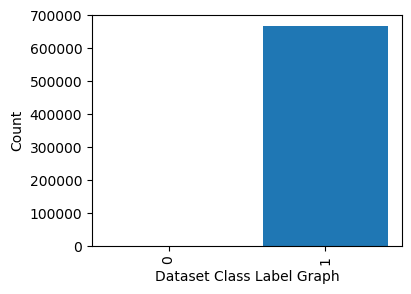

In [22]:
labels, count = np.unique(dataset['attack'].ravel(), return_counts = True)
print("Normal Records : "+str(count[0]))
print("Attack Records : "+str(count[1]))
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.figure(figsize = (4, 3)) 
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Class Label Graph")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [23]:
dataset.isnull().sum()

pkSeqID                             0
stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate        

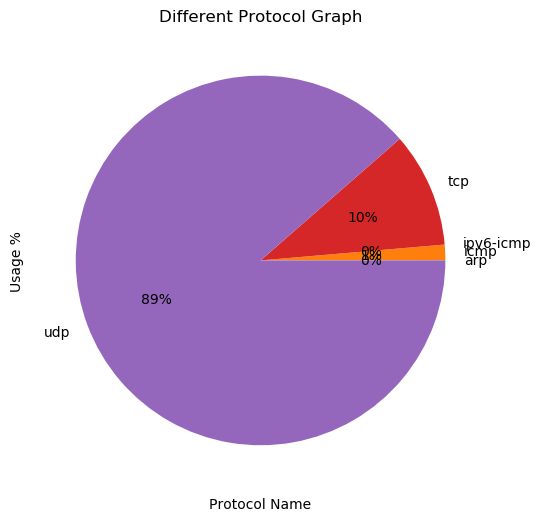

In [24]:
 dataset.groupby("proto").size().plot.pie(autopct='%.0f%%', figsize=(6, 6))
plt.title("Different Protocol Graph")
plt.xlabel("Protocol Name")
plt.ylabel("Usage %")
plt.show()

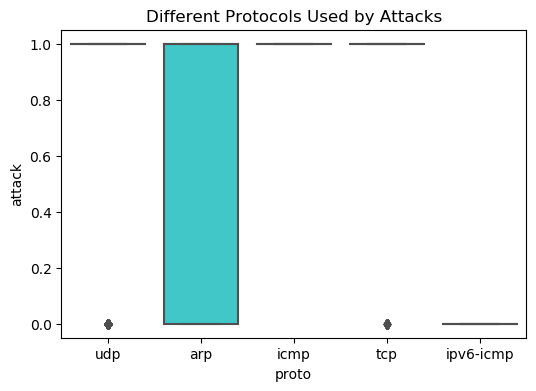

In [25]:
 
data = dataset[['proto', 'attack']]
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='proto', y='attack', palette='rainbow')
plt.title("Different Protocols Used by Attacks")
plt.show()

In [26]:
#drop irrelevant attributes
dataset.drop(['pkSeqID', 'category', 'subcategory'], axis = 1,inplace=True)
#using label encoder to convert non-numeric values to numeric values
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()
encoder5 = LabelEncoder()
encoder6 = LabelEncoder()
encoder7 = LabelEncoder()
dataset['flgs'] = pd.Series(encoder1.fit_transform(dataset['flgs'].astype(str)))#encode all str columns to numeric
dataset['proto'] = pd.Series(encoder2.fit_transform(dataset['proto'].astype(str)))#encode all str columns to numeric
dataset['saddr'] = pd.Series(encoder3.fit_transform(dataset['saddr'].astype(str)))#encode all str columns to numeric
dataset['sport'] = pd.Series(encoder4.fit_transform(dataset['sport'].astype(str)))#encode all str columns to numeric
dataset['daddr'] = pd.Series(encoder5.fit_transform(dataset['daddr'].astype(str)))#encode all str columns to numeric
dataset['dport'] = pd.Series(encoder6.fit_transform(dataset['dport'].astype(str)))#encode all str columns to numeric
dataset['state'] = pd.Series(encoder7.fit_transform(dataset['state'].astype(str)))#encode all str columns to numeric
dataset

,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,pkts,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,1.528099e+09,0,1,4,3,1,58074,16,3629,15,...,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1
1,1.528099e+09,0,1,4,3,1,58085,16,3629,15,...,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1
2,1.528099e+09,0,1,4,3,1,58096,16,3629,15,...,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1
3,1.528099e+09,0,1,4,3,1,58107,16,3629,15,...,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1
4,1.528099e+09,0,1,4,3,1,58119,16,3629,15,...,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668517,1.529381e+09,0,1,3,1,4,27857,16,1906,6,...,471,9.889330,9.889330,19,19,455.754000,9.889330,30,30,1
668518,1.529381e+09,0,1,3,1,4,27859,16,1906,6,...,471,9.889330,9.889330,19,19,10453.000000,9.889330,30,30,1
668519,1.529381e+09,0,1,3,1,4,27864,16,1906,31,...,471,9.889330,9.889330,19,19,10.785200,9.889330,441,441,1
668520,1.529381e+09,0,1,3,1,6,36677,13,2692,2,...,4,22346.400000,666667.000000,1,3,666667.000000,22346.400000,2,4,1


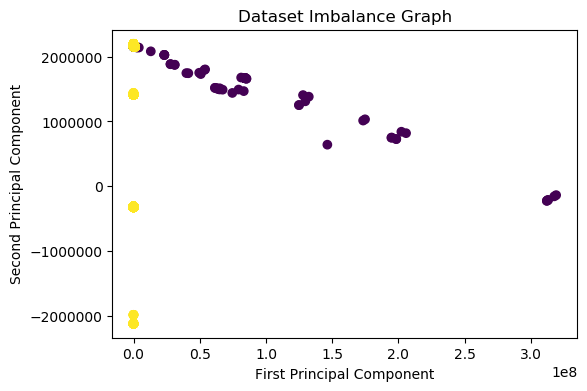

In [40]:

pca = PCA(n_components=2)
temp = dataset.values
X = temp[:,0:temp.shape[1]-1]
Y = temp[:,temp.shape[1]-1]
X = pca.fit_transform(X)
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=Y) 
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Dataset Imbalance Graph")
plt.show() 
    

In [27]:

Y = dataset['attack'].ravel()
data = dataset.values
X = data[:,0:dataset.shape[1]-1]
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]
thr = 50

scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X)
print("Normalize Training Features")
print(X)

Normalize Training Features
[[5.78024447e-01 0.00000000e+00 0.00000000e+00 ... 2.81607500e-07
  7.18836356e-03 6.43558480e-03]
 [5.78024809e-01 0.00000000e+00 0.00000000e+00 ... 2.69358000e-07
  5.89108163e-03 3.79012702e-03]
 [1.47290346e-03 0.00000000e+00 0.00000000e+00 ... 1.25628000e-03
  1.76821304e-03 1.68732724e-03]
 ...
 [5.78024271e-01 0.00000000e+00 0.00000000e+00 ... 3.69125500e-07
  9.12540096e-03 7.07999118e-03]
 [1.69514576e-03 0.00000000e+00 0.00000000e+00 ... 1.23152500e-03
  1.80375501e-03 1.72124337e-03]
 [5.78024284e-01 0.00000000e+00 0.00000000e+00 ... 5.34430000e-07
  1.41901318e-02 1.35410131e-02]]


Normal Records After Smote : 668045
Attack Records After Smote: 668045


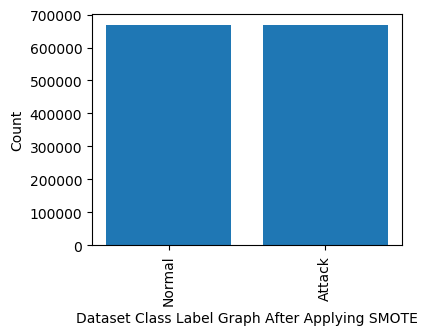

In [28]:

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

labels, count = np.unique(Y, return_counts = True)
print("Normal Records After Smote : "+str(count[0]))
print("Attack Records After Smote: "+str(count[1]))
height = count
bars = ['Normal', 'Attack']
y_pos = np.arange(len(bars))
plt.figure(figsize = (4, 3)) 
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Class Label Graph After Applying SMOTE")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print("Total records found in dataset = "+str(X.shape[0]))
print("Total features found in dataset= "+str(X.shape[1]))
print("80% dataset for training : "+str(X_train.shape[0]))
print("20% dataset for testing  : "+str(X_test.shape[0]))

Total records found in dataset = 1336090
Total features found in dataset= 42
80% dataset for training : 1068872
20% dataset for testing  : 267218


In [30]:

accuracy = []
precision = []
recall = []
fscore = []

In [31]:

def calculateMetrics(algorithm, testY, predict):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FSCORE    : "+str(f))
    labels = ['Normal', 'Attack']
    conf_matrix = confusion_matrix(testY, predict)
    fig, axs = plt.subplots(1,2,figsize=(10, 3))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g", ax=axs[0]);
    ax.set_ylim([0,len(labels)])
    axs[0].set_title(algorithm+" Confusion matrix") 

    random_probs = [0 for i in range(len(testY))]
    p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='orange',label="True classes")
    ns_fpr, ns_tpr, _ = roc_curve(testY, predict, pos_label=1)
    axs[1].plot(ns_fpr, ns_tpr, linestyle='--', label='Predicted Classes')
    axs[1].set_title(algorithm+" ROC AUC Curve")
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive rate')
    plt.show()

Default Decision Tree Algorithm Accuracy  : 99.23283611133981
Default Decision Tree Algorithm Precision : 99.24224657387323
Default Decision Tree Algorithm Recall    : 99.2313637468408
Default Decision Tree Algorithm FSCORE    : 99.23277837938302


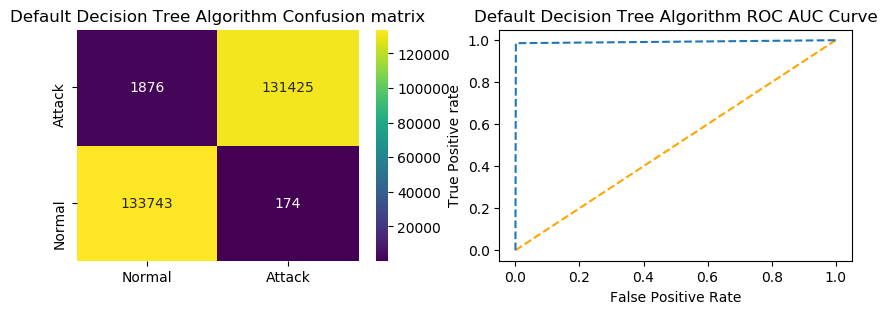

In [32]:

dt_cls = DecisionTreeClassifier(max_depth=1)
dt_cls.fit(X_train, y_train)
predict =dt_cls.predict(X_test)

calculateMetrics("Default Decision Tree Algorithm", y_test, predict)

In [33]:

def gaussianProcess(max_depth, min_samples_split, max_features):
    params_dt = {}
    params_dt['max_depth'] = max_depth
    params_dt['min_samples_split'] = min_samples_split
    params_dt['max_features'] = max_features
    scores = cross_val_score(DecisionTreeClassifier(random_state=123, **params_dt),
                             X_train, y_train, cv=5).mean()
    score = scores.mean()
    return score

In [34]:

params_dt = {'max_depth':(5, 10), 'min_samples_split':(0.1, 0.9), 'max_features':(0.1, 0.9)}
dt_bo = BayesianOptimization(gaussianProcess, params_dt, random_state=111)
dt_bo.maximize(init_points=5, n_iter=2)
params_dt = dt_bo.max['params']
print("Best Optimized Parameters Selected by BOGP = "+str(params_dt))

|   iter    |  target   | max_depth | max_fe... | min_sa... |
-------------------------------------------------------------
| 1         | 0.9821    | 8.061     | 0.2353    | 0.4488    |
| 2         | 0.9948    | 8.846     | 0.3363    | 0.2193    |
| 3         | 0.9928    | 5.112     | 0.4362    | 0.2909    |
| 4         | 0.9995    | 6.688     | 0.8926    | 0.2902    |
| 5         | 0.9921    | 5.406     | 0.6357    | 0.597     |
| 6         | 0.9995    | 6.504     | 0.9       | 0.1101    |
| 7         | 0.9988    | 6.48      | 0.2044    | 0.1156    |
Best Optimized Parameters Selected by BOGP = {'max_depth': 6.688280959443961, 'max_features': 0.892569971704703, 'min_samples_split': 0.29018116312001824}


BOGP Optimized Decision Tree Accuracy  : 99.30655868990861
BOGP Optimized Decision Tree Precision : 99.31531182350304
BOGP Optimized Decision Tree Recall    : 99.30514451699025
BOGP Optimized Decision Tree FSCORE    : 99.30650947914538


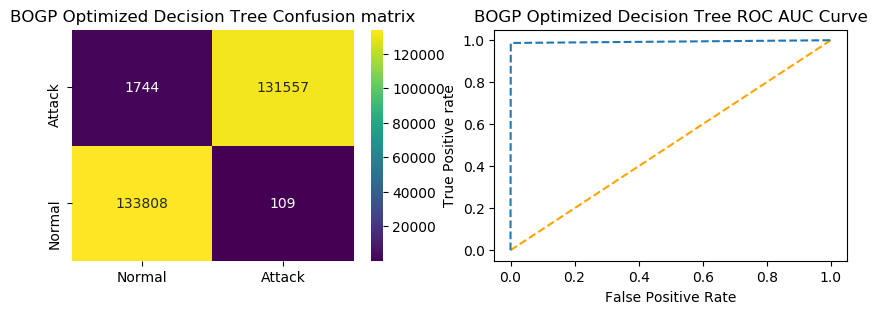

In [35]:

bogp_dt_cls = DecisionTreeClassifier(max_depth=params_dt['max_depth'], max_features=params_dt['max_features'],
                                     min_samples_split=params_dt['min_samples_split'])
bogp_dt_cls.fit(X_train, y_train)
predict = bogp_dt_cls.predict(X_test)
calculateMetrics("BOGP Optimized Decision Tree", y_test, predict)

SVM Algorithm Accuracy  : 96.49611927340224
SVM Algorithm Precision : 96.4962907663755
SVM Algorithm Recall    : 96.49596003587244
SVM Algorithm FSCORE    : 96.49608949533528


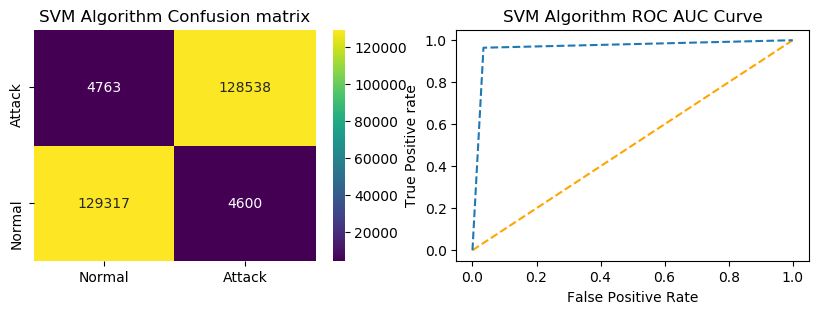

In [36]:

svm_cls = svm.SVC()
svm_cls.fit(X_train[0:thr], y_train[0:thr])
predict = svm_cls.predict(X_test) 
calculateMetrics("SVM Algorithm", y_test, predict)

Extension CNN Accuracy  : 99.99625773712849
Extension CNN Precision : 99.99626662286171
Extension CNN Recall    : 99.99624909040442
Extension CNN FSCORE    : 99.99625771659069


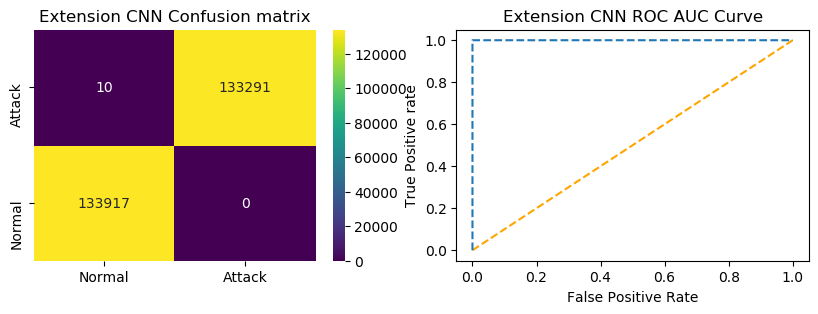

In [37]:
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

cnn_model = Sequential()

cnn_model.add(Convolution2D(32, (1 , 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))

cnn_model.add(MaxPooling2D(pool_size = (1, 1)))

cnn_model.add(Convolution2D(16, (1, 1), activation = 'relu'))

cnn_model.add(MaxPooling2D(pool_size = (1, 1)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 256, activation = 'relu'))
cnn_model.add(Dense(units = y_train1.shape[1], activation = 'softmax'))
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/cnn_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose = 1, save_best_only = True)
    hist = cnn_model.fit(X_train1, y_train1, batch_size = 32, epochs = 5, validation_data=(X_test1, y_test1), callbacks=[model_check_point], verbose=1)
    f = open('model/cnn_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    cnn_model.load_weights("model/cnn_weights.hdf5")
predict = cnn_model.predict(X_test1)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test1, axis=1)
calculateMetrics("Extension CNN", y_test1, predict)

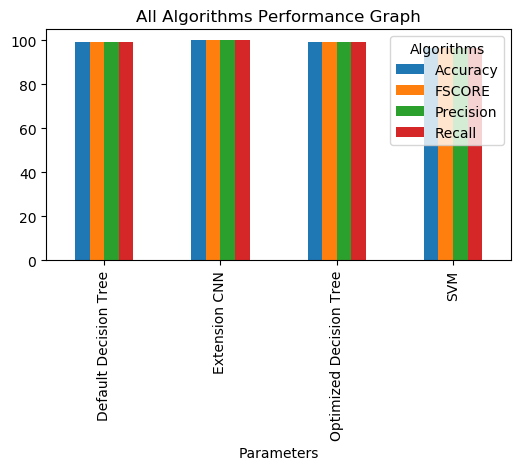

In [38]:
df = pd.DataFrame([['Default Decision Tree','Accuracy',accuracy[0]],['Default Decision Tree','Precision',precision[0]],['Default Decision Tree','Recall',recall[0]],['Default Decision Tree','FSCORE',fscore[0]],
                   ['Optimized Decision Tree','Accuracy',accuracy[1]],['Optimized Decision Tree','Precision',precision[1]],['Optimized Decision Tree','Recall',recall[1]],['Optimized Decision Tree','FSCORE',fscore[1]],
                   ['SVM','Accuracy',accuracy[2]],['SVM','Precision',precision[2]],['SVM','Recall',recall[2]],['SVM','FSCORE',fscore[2]],
                   ['Extension CNN','Accuracy',accuracy[3]],['Extension CNN','Precision',precision[3]],['Extension CNN','Recall',recall[3]],['Extension CNN','FSCORE',fscore[3]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar', figsize=(6, 3))
plt.title("All Algorithms Performance Graph")
plt.show()

In [39]:
algorithms = ['Default Decision Tree', 'Optimized Decision Tree', 'SVM', 'Extension CNN']
data = []
for i in range(len(accuracy)):
    data.append([algorithms[i], accuracy[i], precision[i], recall[i], fscore[i]])
data = pd.DataFrame(data, columns=['Algorithm Name', 'Accuracy', 'Precision', 'Recall', 'FSCORE'])
data   

,Algorithm Name,Accuracy,Precision,Recall,FSCORE
0,Default Decision Tree,99.232836,99.242247,99.231364,99.232778
1,Optimized Decision Tree,99.306559,99.315312,99.305145,99.306509
2,SVM,96.496119,96.496291,96.495960,96.496089
3,Extension CNN,99.996258,99.996267,99.996249,99.996258
